<a href="https://colab.research.google.com/github/miguelArboleda28/inteligenciaArtificial-II/blob/main/Perceptron_I_A_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


In [6]:
df = pd.read_csv('/content/bmi.csv')
print(df)

     Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]


In [7]:
df_l2 = pd.read_csv('/content/bmi.csv')
df_l2 = df_l2.rename(columns={'Index': 'IMC'})
print(df_l2)

     Gender  Height  Weight  IMC
0      Male     174      96    4
1      Male     189      87    2
2    Female     185     110    4
3    Female     195     104    3
4      Male     149      61    3
..      ...     ...     ...  ...
495  Female     150     153    5
496  Female     184     121    4
497  Female     141     136    5
498    Male     150      95    5
499    Male     173     131    5

[500 rows x 4 columns]


**EL IMC ES FLOAT**

In [8]:
df_l2['IMC'] = (df_l2['Weight']//((df_l2['Height']/100)**2))
df_l2[['IMC']] = df_l2[['IMC']].astype(int)
print (df_l2)

     Gender  Height  Weight  IMC
0      Male     174      96   31
1      Male     189      87   24
2    Female     185     110   32
3    Female     195     104   27
4      Male     149      61   27
..      ...     ...     ...  ...
495  Female     150     153   68
496  Female     184     121   35
497  Female     141     136   68
498    Male     150      95   42
499    Male     173     131   43

[500 rows x 4 columns]


**2 a** - > La media de la altura es 170cm, su punto máximo es 200cm y su valor mínimo es aproximadamente 155cm, como la caja esta bien centralizada y su media también se pude concluir que la relación de los datos es la adecuada.
La media del peso es aproximadamente 113kg, su punto máximo es aproximadamente 160kg y su valor mínimo es menor que 60kg pero mayor que 1, se puede concluir lo mismo que la altura, la relación de los datos es la adecuada para su estudio.
La media del IMC es 35, su punto máximo es aproximadamente 75 y su valor mínimo es menor 12, se concluye que su caja es asimétrica hacia la parte inferior lo cual indica que los datos pueden no estar distribuidos normalmente y también encontramos valores atípicos estos probablemente son datos que se han medido mal y por tanto no deberían tenerse en cuenta en su estudio.

**CUAL ES CUAL? PORQUE NO LE PUSIERON NOMBRES?**

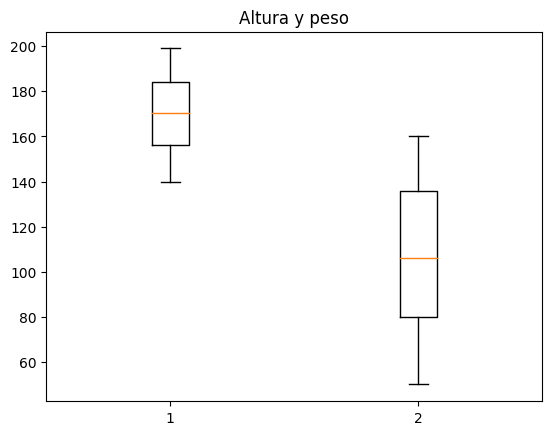

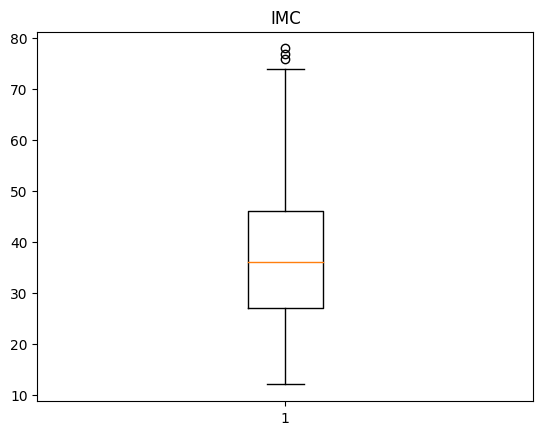

In [9]:
a = [df_l2 ['Height'], df_l2['Weight']]
plt.boxplot(a)
plt.title("Altura y peso")
plt.show()

b = df_l2 ['IMC']
plt.boxplot(b)
plt.title("IMC")
plt.show()

**2 b**

-> En el caso de Peso Vs Altura, se observa que no hay un patrón de comportamiento especial en los puntos; a simple vista no se visualiza qué efecto produce la variable independiente sobre la dependiente, por lo que no hay correlación en los datos.

-> Para el caso IMC Vs Peso, en esta la distribución de los puntos hace pensar que podemos trazar una línea recta que pase aproximadamente a la misma distancia de la mayoría de los puntos. Por lo que podemos decir que es una correlación lineal posititva, lo que se traduce en que a mayor IMC el peso se incrementa.

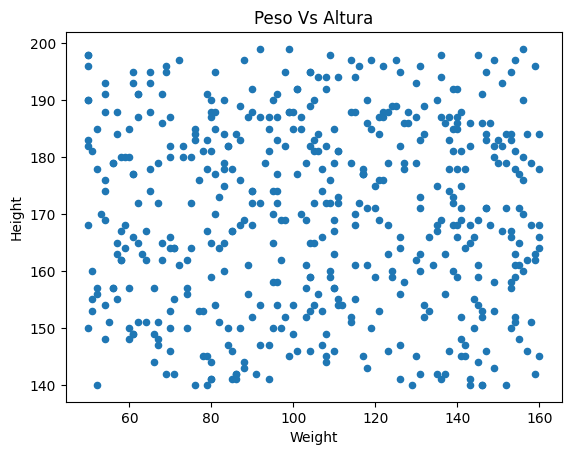

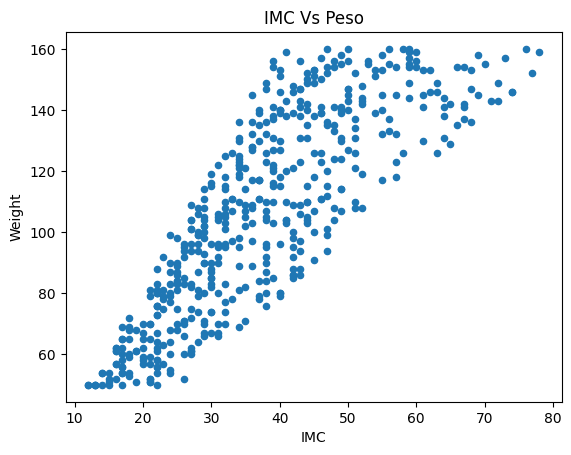

In [10]:
df_l2.plot.scatter(x = "Weight", y = "Height", alpha = 1)
plt.title("Peso Vs Altura")
plt.show()

df_l2.plot.scatter(x = "IMC", y = "Weight", alpha = 1)
plt.title("IMC Vs Peso")
plt.show()

3a

In [ ]:
X = np.array(df_l2['Weight']).reshape (-1,1)
y = np.array(df_l2['IMC'])

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

def training(X, y, epochs):
    m, n = X.shape
    lr=0.0001
    weights = np.zeros((n,1))
    bias = 0

    y = y.reshape(m,1)

    losses = []

    for epoch in range(epochs):
        y_hat = np.dot(X, weights) + bias
        loss = np.mean((y_hat - y)**2)
        losses.append(loss)
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y))
        weights -= lr*dw
        bias -= lr*db
    return weights, bias, losses

def predict(X, weights, bias):
      return np.dot(X, weights) + bias

X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')


In [12]:
y_test_preds = predict(X_test, w, b)
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
print(compare)
print(np.mean(y_test-y_test_preds)**2)

     Actual             Predicted
0        28   [23.34716953422445]
1        26  [34.656706488370645]
2        17  [22.617521988795662]
3        59   [58.00542794209181]
4        47   [55.45166153309106]
..      ...                   ...
470      68   [55.81648530580546]
471      35   [44.14212457894487]
472      68   [49.61448116966077]
473      42  [34.656706488370645]
474      43    [47.7903623060888]

[475 rows x 2 columns]
2.1441637735687697


3 b

Text(0, 0.5, 'y (Target) : IMC')

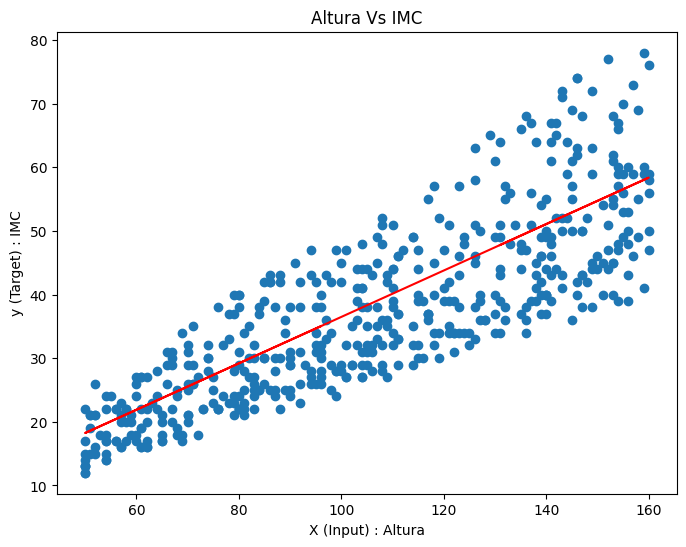

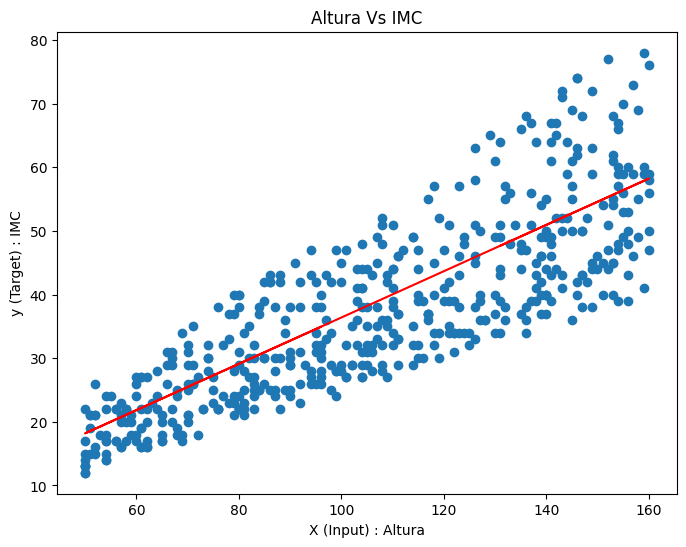

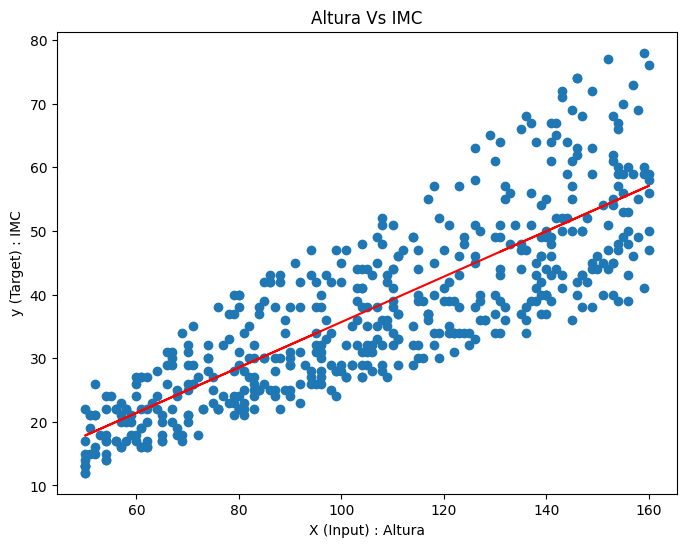

In [13]:
X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

X_train, X_test, y_train, y_test = X[:35], X[15:], y[:35], y[15:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

X_train, X_test, y_train, y_test = X[:45], X[5:], y[:45], y[5:]
w, b, l  = training(X_train, y_train, epochs=100)

plt.figure(figsize = (8,6))
plt.scatter(X,y)
plt.plot(X, predict(X, w, b), color='red')
plt.title('Altura Vs IMC')
plt.xlabel('X (Input) : Altura')
plt.ylabel('y (Target) : IMC')

**ERAN TRES MODELOS EN LA MISMA GRAFICA**

**4 a** -> Lo primero que se debe hacer es agregar la segunda variable en nuestra X,**(UN SEGUNDO PESO)** dandole a entender al algoritmo que trabajaremos con dos variables en vez de una; luego quitariamos el reshape ya que en este caso no se necesita y modificariamos el lr para que el numero de saltos entre cada iteracion sea, en este caso, mas pequeño y asi dar predicciones mas exactas y un numero de error menor **¿POR QUE CAMBIAR?**.

**4 b** -> En caunto a los pesos y el bias, el cambio y/o actualizacion mas grande se veria en los pesos, ya que no se tendria uno solo, sino dos, entonces ya no tendriamos en cuenta la formula h(x)=Wx+b, usariamos W0Xo+W1X1+.....+b segun las variables que usemos, por ende ambos deben actualizarse simultaneamente. En cuanto al bias este sigue igual porque solo hay uno. **¿COMO SE ACTUALIZAN?**

In [14]:
X = np.array(df_l2[['Weight', 'Height']])
y = np.array(df_l2['IMC'])

def training(X, y, epochs):
    m, n = X.shape
    lr=0.000001
    weights = np.zeros((n,1))
    bias = 0

    y = y.reshape(m,1)

    losses = []

    for epoch in range(epochs):
        y_hat = np.dot(X, weights) + bias
        loss = np.mean((y_hat - y)**2)
        losses.append(loss)
        dw = (1/m)*np.dot(X.T, (y_hat - y))
        db = (1/m)*np.sum((y_hat - y))
        weights -= lr*dw
        bias -= lr*db
    return weights, bias, losses

def predict(X, weights, bias):
      return np.dot(X, weights) + bias

X_train, X_test, y_train, y_test = X[:25], X[25:], y[:25], y[25:]
w, b, l  = training(X_train, y_train, epochs=100)


In [15]:
y_test_preds = predict(X_test, w, b)
compare = pd.DataFrame({'Actual':y_test, 'Predicted':list(y_test_preds)})
print(compare)
print(np.mean(y_test-y_test_preds)**2)

     Actual             Predicted
0        28  [28.713379068912648]
1        26  [37.841528202265195]
2        17  [33.516444658989734]
3        59   [41.63526181894552]
4        47   [43.04678998429871]
..      ...                   ...
470      68   [39.10533704926851]
471      35   [40.07832141091281]
472      68   [35.83368146516257]
473      42  [32.241818602295524]
474      43   [39.72176652039925]

[475 rows x 2 columns]
0.8413580603147828
